In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import time
import datetime
import random
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Part I. Gather Data

## 1. Gathering twitter archive data

In [2]:
#First source to gather from is csv file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## 2. Gathering Image Prediction

In [3]:
# Image prediction file will be downloaded using request library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv' , 'wb') as file:
    image_predictions = response
    file.write(image_predictions.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

## 3. Gathering Data from Twitter

Unfortunatelly, my request for Twitter Developer account was denied. 
Therefore, the code below was provided by instructor and available on udacity page.


In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [6]:
# 3 attributes will be used from txt file - tweet_id, favorites and retweets.

attributes = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        attributes.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
tweet_attributes = pd.DataFrame(attributes, columns=['tweet_id','favorites','retweets'])

# Part II. Asses Data

In this part, all three dataframes created in the previous step will be assesed in order to detect issues that have to be fixed in the next stage of the reasearch.
All issues found in original dataframes will fall either into "quality" or "tidiness" category.
Not all issues will be fixed, but only those that may hinder further analysis.

### 2.1 Assesing twitter_archive

In [7]:
# Visually asses first, last and random 5 rows of dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None
1469,694183373896572928,NaN,NaN,2016-02-01 15:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She realized mid hug that she's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694183373...,9,10,Lola,None,None,None,None
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None


##### Issues:

- Dog stages are broken into 4 columns
- Some names are incorrect, such as "a"

In [10]:
# Check datatypes and null values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Issues:
- There are 78 replies
- There are 181 retweets
- tweet_id dtype int64
- timestamp has incorrect dtype

In [11]:
#Check null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
#Check duplicated IDs
twitter_archive.tweet_id.duplicated().sum()

0

Find names starting with lower case letter indicating error in 'name' column

In [13]:
missing_names = twitter_archive[twitter_archive['name'].str.contains('^[a-z]', regex = True) == True]

In [14]:
missing_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 22 to 2354
Data columns (total 17 columns):
tweet_id                      109 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     109 non-null object
source                        109 non-null object
text                          109 non-null object
retweeted_status_id           5 non-null float64
retweeted_status_user_id      5 non-null float64
retweeted_status_timestamp    5 non-null object
expanded_urls                 109 non-null object
rating_numerator              109 non-null int64
rating_denominator            109 non-null int64
name                          109 non-null object
doggo                         109 non-null object
floofer                       109 non-null object
pupper                        109 non-null object
puppo                         109 non-null object
dtypes: float64(4), int64(3), object(10)
memory usag

##### Issues:
- 109 incorrect names
- 5 of them are retweets and will be dropped

In [15]:
#check columns names
for col, i  in enumerate(twitter_archive.columns): 
    print(col,i) 

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo


In [16]:
# Denominators not equal to 10 must be erroneous
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive.query('rating_denominator != 10').shape

(23, 17)

##### Issues:
- There are 23 incorrect entries in denominator column

In [18]:
# Check extreme and unusual numerator values
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### Issues:

- There are number of extremely low and large numbers in numerator column

In [19]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### Issues:
- Source text is not in readable format

In [20]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Issues:

- Column names "p1", "p1_conf" etc. are confusing in regards to what information they hold

In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [23]:
image_predictions[image_predictions['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


There are 3 sets of columns for each prediction parameter - breed, confidence and whether predicted value is a dog or not, but for analyses purposes, only the first prediction will suffice.

p1_dog == False:
From text, it is clear that not all entries are related to dogs. 

In [24]:
tweet_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Summary:

Tidiness issues:
1. twitter_archive: Column headers for dog stage are values, not variable names. 

2. all: 3 dataframes should be merged in one.

3. twitter_archive and image_prediction: Extra columns that are not useful for analysis 
  

Quality issues:
1. twitter_archive: Timestamp is not in datetime format
2. twitter_archive: Some dog names are invalid
3. twitter_archive: Some erroneous entries in denominator column 
4. twitter_archive: Some erroneous entries in numerator column 
5. twitter_archive: Tweet id is stored as integer 
6. image_predictions: there are 3 columns for predictions and 3 for confidence level, but only top predictions should be enough for further analysis
7. twitter_archive: source is in url format - not the most readable format 
8. twitter_archive: Some tweets are retweets and replies to original tweets
9. image_predictions: Some tweets are not related to dogs, which may distort results of analysis.


# Part III. Clean Data

In [25]:
# creating copies of all dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_attributes_clean = tweet_attributes.copy()

##### Quality 1. Retweets and Replies
##### Define: 
Since only original tweets are required for further analysis, replies and retweets should be dropped from dataset

##### Code:

In [26]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna() & twitter_archive_clean['in_reply_to_status_id'].isna()]

##### Test:

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

##### Quality 2. Timestamp is not in datetime format

##### Define:
Change dtype

##### Code:

In [28]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test:

In [29]:
twitter_archive_clean['timestamp'].dtype

dtype('<M8[ns]')

In [30]:
# I was not familiar with '<M8[ns]' format, however, 
# after quick research i found an answer on stackoverflow  
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

##### Quality 3. Some dog names are incorrect
##### Define: Without dropping the whole row, erroneous name will be changed to "None"

##### Code:

In [31]:
#Define a list of unique values that are present in the 'name' column instead of actual names
incorrect_names = list(twitter_archive_clean[twitter_archive_clean['name'].str.contains('^[a-z]', regex = True) == True]['name'].unique())

In [32]:
#we can see that all values below are not names
incorrect_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [33]:
#Substitute value in the column "name" to "None" if it is in the list of incorrect names
twitter_archive_clean.loc[twitter_archive_clean.name.isin(incorrect_names), 'name'] = 'None'

##### Test:

In [34]:
twitter_archive_clean[twitter_archive_clean['name'].str.contains('^[a-z]', regex = True) == True]['name'].unique()

array([], dtype=object)

##### Quality 4. Change dtype of tweet_id

##### Define: tweet_id is stored as int64, which is not necessary and should be converted to string

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

##### Code:

In [36]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweet_attributes_clean['tweet_id'] = tweet_attributes_clean['tweet_id'].astype(str)

##### Test:

In [37]:
(twitter_archive_clean['tweet_id'].dtype,
image_predictions_clean['tweet_id'].dtype,
tweet_attributes_clean['tweet_id'].dtype)

(dtype('O'), dtype('O'), dtype('O'))

##### Quality 5. Erroneous entries in denominator column

##### Define:
Check if original rating is in the text to retrive denominator.

Drop row if original rating is not present 

In [38]:
#Check if original rating is in the text 
twitter_archive_clean.query('rating_denominator != 10')[['tweet_id', 'text', 'rating_denominator']]

,tweet_id,text,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7
902,758467244762497024,Why does this never happen at my front door......,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",50


In [39]:
# to read text
pd.set_option('display.max_colwidth', -1)

#### Notes:
multipple dogs in the picture, therfore Reset to 10:

697463031882764288<br>
704054845121142784<br>
684222868335505415<br>
713900603437621249<br>
709198395643068416<br>
710658690886586372<br>
682962037429899265<br>
677716515794329600<br>
675853064436391936<br>
820690176645140481<br>
758467244762497024<br>

rating is in the text reset to 10:
722974582966214656<br>
716439118184652801<br>
740373189193256964<br>
666287406224695296<br>

The rating is unclear from text and should be dropped:
731156023742988288<br>
810984652412424192<br>

##### Code:

In [40]:
#Create a list of id's for which denominator should be changed to 10
denominator_10 = ['666287406224695296',
                  '697463031882764288', 
                  '704054845121142784', 
                  '684222868335505415',
                  '713900603437621249',
                  '709198395643068416', 
                  '710658690886586372',
                  '682962037429899265',
                  '677716515794329600',
                  '675853064436391936',
                  '820690176645140481',
                  '758467244762497024',
                  '722974582966214656',
                  '716439118184652801',
                  '740373189193256964']

In [41]:
#Change denominator to 10 if id is in the list 'denominator_10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id.isin(denominator_10), 'rating_denominator'] = 10

In [42]:
# There are still 2 id's that should be dropped
drop_id = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10].index

In [43]:
twitter_archive_clean.drop(drop_id, inplace = True)

##### Test:

In [44]:
twitter_archive_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Quality 6. Erroneous entries in numerator column


##### Define:

Similarly to previous method, check if numerator can be retrieved from text.

Change to correct numerator or drop if no correct numerator can be retieved

In [45]:
# Read through the text to find valid rating
twitter_archive_clean.query('rating_numerator > 25 or rating_numerator == 0')[['tweet_id', 'text', 'rating_numerator']]

,tweet_id,text,rating_numerator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45


##### Notes:

All numerator less than 10 will be assumed as valid after checking several texts.

Multiple dogs in the pic, hence numerator should be divided by number of pups:

697463031882764288 convert to 11<br>
778027034220126208 convert to 11<br>
704054845121142784 convert to 12<br>
684222868335505415 convert to 11<br>
713900603437621249 convert to 11<br>
710658690886586372 convert to 10<br>
677716515794329600 convert to 12<br>
675853064436391936 convert to 11<br>
820690176645140481 convert to 12<br>
758467244762497024 convert to 11<br>

Rating is in the text:

716439118184652801 convert to 11<br>
709198395643068416 convert to 9<br>

Rating should be rounded:

680494726643068929 convert to 11<br>
786709082849828864 convert to 10<br>
778027034220126208 convert to 11<br>

Bizzarely, ratings of 1776 and 420 are both "correct" with former refering to the year Declaration of Independence was issued and latter being reference to celebration observed in certain subculture on 4 th of April.
Rating of 0 also seems valid, although meant as a joke

##### Code:

In [46]:
# Create lists of id's sorted by correct numerator
convert_to_10 = ['710658690886586372',
                 '786709082849828864']

convert_to_11 = ['697463031882764288',
                 '778027034220126208',
                 '684222868335505415',
                 '713900603437621249',
                 '675853064436391936',
                 '758467244762497024',
                 '716439118184652801',
                 '680494726643068929',
                 '778027034220126208']

convert_to_12 = ['704054845121142784',
                 '677716515794329600',
                 '820690176645140481']

In [47]:
# Only 1 entry should be converted to 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == "709198395643068416", 'rating_numerator'] = 9

In [48]:
# Convert to correct numerator
twitter_archive_clean.loc[twitter_archive_clean.tweet_id.isin(convert_to_10), 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id.isin(convert_to_11), 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id.isin(convert_to_12), 'rating_numerator'] = 12

##### Test:

In [49]:
twitter_archive_clean.rating_numerator.value_counts()

12      489
10      438
11      421
13      287
9       154
8       98 
7       52 
14      38 
5       34 
6       32 
3       19 
4       16 
2       9  
1       5  
420     1  
1776    1  
0       1  
Name: rating_numerator, dtype: int64

##### Quality 7. Change url values in 'source' column to more readable value

##### Define:
There are 4 types of sources, so we can manually change to shorter text

##### Code:

In [50]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

##### Test:

In [51]:
twitter_archive_clean.source.value_counts()

Twitter for iphone     1962
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

##### Quality 8. Column names are confusing

In [52]:
image_predictions_clean.rename(columns = {'p1': 'prediction_breed', 'p1_conf': 'prediciton_confidence', 'p1_dog': 'prediction_dog'}, inplace = True)

In [53]:
twitter_archive_clean.rename(columns = {'rating_numerator': 'rating'}, inplace = True)

##### Test:

In [54]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,prediction_breed,prediciton_confidence,prediction_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [55]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


#### Tidiness 1. twitter_archive: Column headers for dog stage are values, not variable names.





##### Define:

Melt 4 columns with dog stages into 1 column "dog_stage", then drop dupplicated values keeping only the one with actual dog stage. Lastly, drop column with converted column names into values, leaving only one column "dog_stage"

##### Code:

In [56]:
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [57]:
twitter_archive_clean = pd.melt(twitter_archive_clean, 
        id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating', 'rating_denominator',
       'name'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'stage', value_name = 'dog_stage')

In [58]:
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [59]:
twitter_archive_clean.drop(labels = 'stage', axis = 1, inplace = True)

##### Test:

In [60]:
twitter_archive_clean.dog_stage.value_counts()

None       1759
pupper     230 
doggo      72  
puppo      24  
floofer    10  
Name: dog_stage, dtype: int64

##### Tidiness 2.  Merge Dataframes

##### Define: 

Currently, data required for further analysis is stored in 3 different dataframes. Let's merge it into one for conveneice.

##### Code:

In [61]:
# First, let's merge 2 dataframes and then merge newly created df with the twitter_archive_clean
temporary_df = pd.merge(image_predictions_clean, tweet_attributes_clean, on='tweet_id', how = 'inner')

In [62]:
df_clean = pd.merge(twitter_archive_clean, temporary_df, on='tweet_id', how = 'inner')

##### Test:

In [63]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num',
       'prediction_breed', 'prediciton_confidence', 'prediction_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites',
       'retweets'],
      dtype='object')

##### Tidiness 3. Drop extra columns

##### Define 
There are number of columns in newly creaeted df that hold no meaningful information or will not be used in further analysis, therefore, such columns will be dropped from final df.

##### Code:

In [64]:
df_clean.drop(['in_reply_to_status_id',
               'in_reply_to_user_id',
               'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp',
               'expanded_urls',
               'rating_denominator',
               'jpg_url',
               'img_num',
               'p2',
               'p2_conf',
               'p2_dog',
               'p3',
               'p3_conf',
               'p3_dog'], axis =1, inplace = True)

##### Test:

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 12 columns):
tweet_id                 1969 non-null object
timestamp                1969 non-null datetime64[ns]
source                   1969 non-null object
text                     1969 non-null object
rating                   1969 non-null int64
name                     1969 non-null object
dog_stage                1969 non-null object
prediction_breed         1969 non-null object
prediciton_confidence    1969 non-null float64
prediction_dog           1969 non-null bool
favorites                1969 non-null int64
retweets                 1969 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 186.5+ KB


##### Quality 9. Tweets not about dogs

##### Define: 
Drop entries for which dog_prediction is False

##### Code:

In [66]:
df_clean = df_clean[df_clean['prediction_dog'] == True]

##### Test:

In [67]:
df_clean.prediction_dog.value_counts()

True    1462
Name: prediction_dog, dtype: int64

In [68]:
# This is final version of cleaned dataset
df_clean.head()

,tweet_id,timestamp,source,text,rating,name,dog_stage,prediction_breed,prediciton_confidence,prediction_dog,favorites,retweets
0,667405339315146752,2015-11-19 18:13:27,Twitter for iphone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,7,Biden,None,Saint_Bernard,0.381377,True,489,234
1,667435689202614272,2015-11-19 20:14:03,Twitter for iphone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,None,None,Rottweiler,0.999091,True,326,89
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,11,Cupcake,None,Labrador_retriever,0.825670,True,327,96
5,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,7,Reese,None,Tibetan_terrier,0.676376,True,203,66
6,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,11,None,None,toy_poodle,0.304175,True,273,102


# Part IV. Store Data

In [69]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

# Analyzing 

1. Top stage
2. Top breed
3. Source
4. Favourite and Retweets

In [114]:
plt.rcParams['figure.figsize'] = (15, 6)

## User Habits

1. First, let's check at what time there is higher WeRateDogs account activity

Text(0.5,1,'Number of Tweets by Hour')

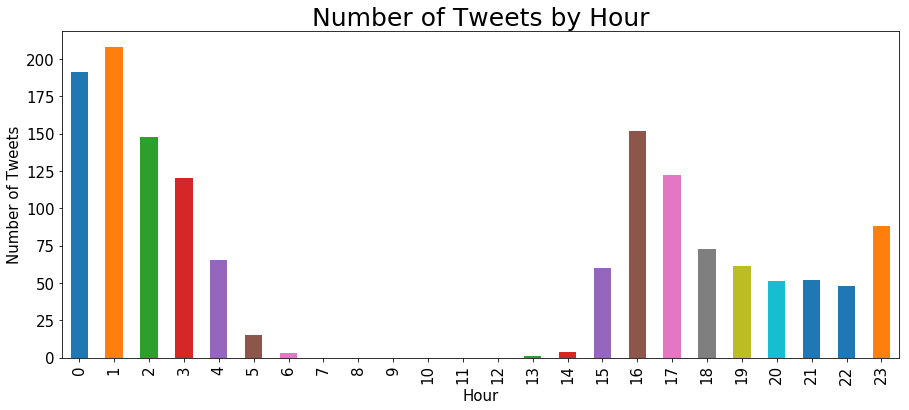

In [115]:
time = df_clean.groupby(df_clean["timestamp"].dt.hour).count().reindex(np.arange(24), fill_value=0)['timestamp']
time.plot(kind="bar", fontsize = 15)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)
plt.title("Number of Tweets by Hour", fontsize = 25)

2. Second, what is the most used platform

Text(0.5,1,'Preferred Platform')

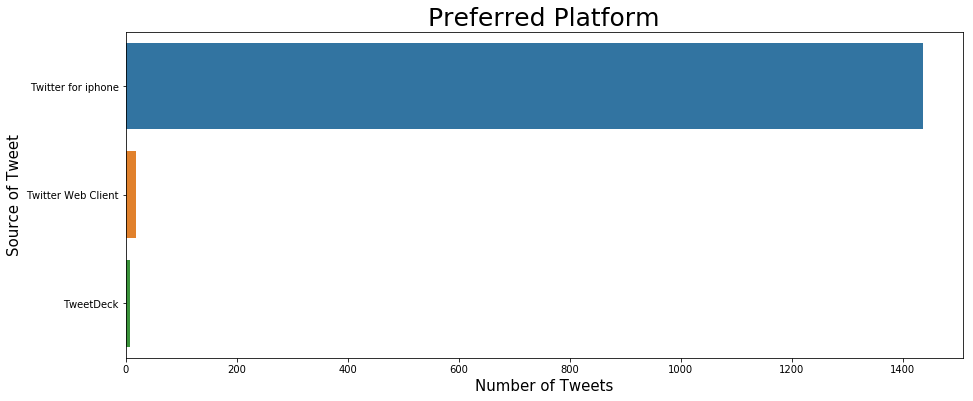

In [123]:
sns.countplot(data = df_clean, y = 'source')
plt.ylabel("Source of Tweet", fontsize = 15)
plt.xlabel("Number of Tweets", fontsize = 15)
plt.title("Preferred Platform", fontsize = 25)

3. How many words per tweet it usually takes

In [107]:
df_clean['number_of_words'] = df_clean.text.apply(lambda x: len(x.split()))

In [108]:
df_clean

,tweet_id,timestamp,source,text,rating,name,dog_stage,prediction_breed,prediciton_confidence,prediction_dog,favorites,retweets,number_of_words
0,667405339315146752,2015-11-19 18:13:27,Twitter for iphone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,7,Biden,None,Saint_Bernard,0.381377,True,489,234,8
1,667435689202614272,2015-11-19 20:14:03,Twitter for iphone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,None,None,Rottweiler,0.999091,True,326,89,3
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,11,Cupcake,None,Labrador_retriever,0.825670,True,327,96,11
5,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,7,Reese,None,Tibetan_terrier,0.676376,True,203,66,20
6,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,11,None,None,toy_poodle,0.304175,True,273,102,20
7,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,7,None,None,borzoi,0.852088,True,559,242,21
8,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,9,Philippe,None,Chihuahua,0.143957,True,565,294,18
9,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,11,Hall,None,Labrador_retriever,0.996709,True,563,231,21
10,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,12,None,None,beagle,0.636169,True,7148,2272,16
11,667517642048163840,2015-11-20 01:39:42,Twitter Web Client,This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,8,Dook,None,Italian_greyhound,0.125176,True,389,203,25


Text(0.5,1,'Distribution of Word counts')

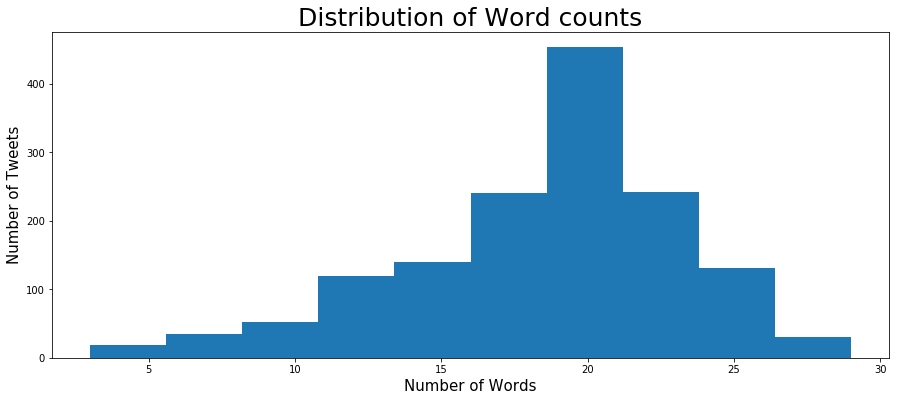

In [117]:
plt.hist(df_clean.number_of_words, bins = 10)
plt.xlabel("Number of Words", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)
plt.title("Distribution of Word counts", fontsize = 25)

## Most Popular Breed

2.1 What dog breed are in top 10 by number of tweets

In [110]:
most_popular_breed = df_clean.groupby(df_clean.prediction_breed, as_index = False).count()

In [111]:
most_popular_breed = most_popular_breed.nlargest(10, 'rating')

In [112]:
most_popular_breed

,prediction_breed,tweet_id,timestamp,source,text,rating,name,dog_stage,prediciton_confidence,prediction_dog,favorites,retweets,number_of_words
87,golden_retriever,136,136,136,136,136,136,136,136,136,136,136,136
35,Labrador_retriever,94,94,94,94,94,94,94,94,94,94,94,94
47,Pembroke,88,88,88,88,88,88,88,88,88,88,88,88
15,Chihuahua,78,78,78,78,78,78,78,78,78,78,78,78
99,pug,54,54,54,54,54,54,54,54,54,54,54,54
79,chow,41,41,41,41,41,41,41,41,41,41,41,41
53,Samoyed,40,40,40,40,40,40,40,40,40,40,40,40
48,Pomeranian,38,38,38,38,38,38,38,38,38,38,38,38
106,toy_poodle,37,37,37,37,37,37,37,37,37,37,37,37
93,malamute,29,29,29,29,29,29,29,29,29,29,29,29


Text(0.5,1,'Top-10 Breeds by Number of Tweets')

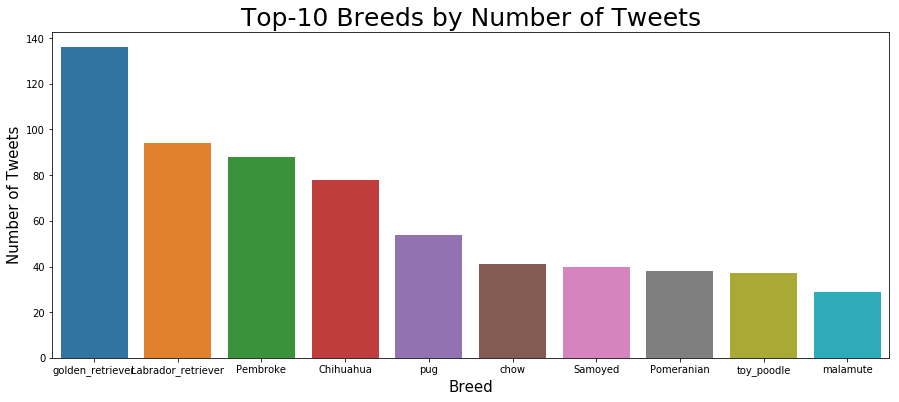

In [118]:
sns.barplot(x = "prediction_breed", y = 'tweet_id', data = most_popular_breed)
plt.xlabel("Breed", fontsize = 15)
plt.ylabel("Number of Tweets", fontsize = 15)
plt.title("Top-10 Breeds by Number of Tweets", fontsize = 25)

2.2 Top-10 Breeds by number of liked tweets 

Text(0.5,1,'Top-10 Dog Breeds by Favorite Tweets')

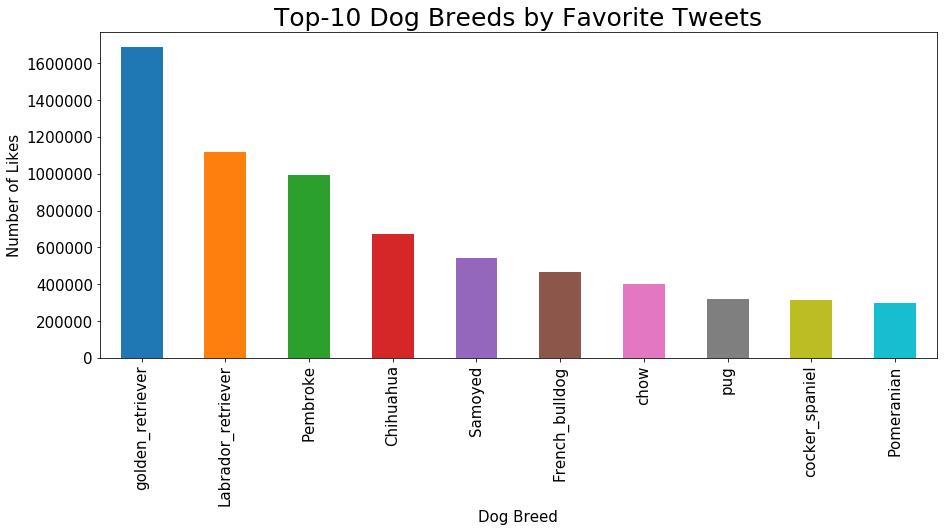

In [124]:
df_clean.groupby('prediction_breed')['favorites'].sum().sort_values(ascending=False).nlargest(10).plot(kind='bar', fontsize = 15)
plt.xlabel("Dog Breed", fontsize = 15)
plt.ylabel("Number of Likes", fontsize = 15)
plt.title("Top-10 Dog Breeds by Favorite Tweets",fontsize=25)

2.3 What are Top-10 Breeds by Average Rating.


In order to filter outliers, min number of breed entries must be 5.

In [120]:
df_rating_min_5 = df_clean['prediction_breed'].value_counts()

In [121]:
df1_rating_min_5 = df_clean[df_clean['prediction_breed'].isin(df_rating_min_5[df_rating_min_5 > 5].index)]

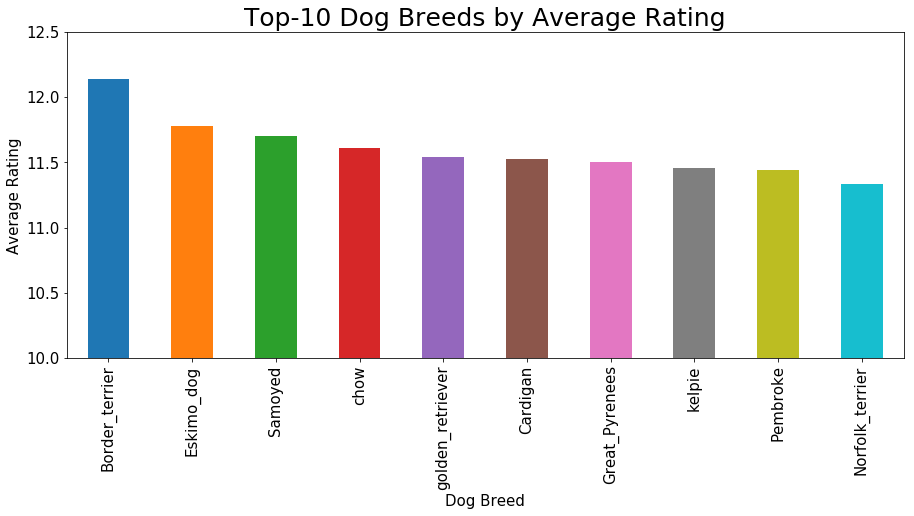

In [122]:
df1_rating_min_5.groupby('prediction_breed')['rating'].mean().sort_values(ascending=False).nlargest(10).plot(kind='bar', fontsize = 15)
plt.xlabel("Dog Breed", fontsize = 15)
plt.ylabel("Average Rating", fontsize = 15)
plt.title("Top-10 Dog Breeds by Average Rating",fontsize=25)
plt.ylim(10,12.5);

## Most Popular Names and Stage

3.1 What are the most popular names

In [87]:
df_clean_names_filtered = df_clean[df_clean['name'] != "None"]

Text(0.5,1,'Top-10 Names')

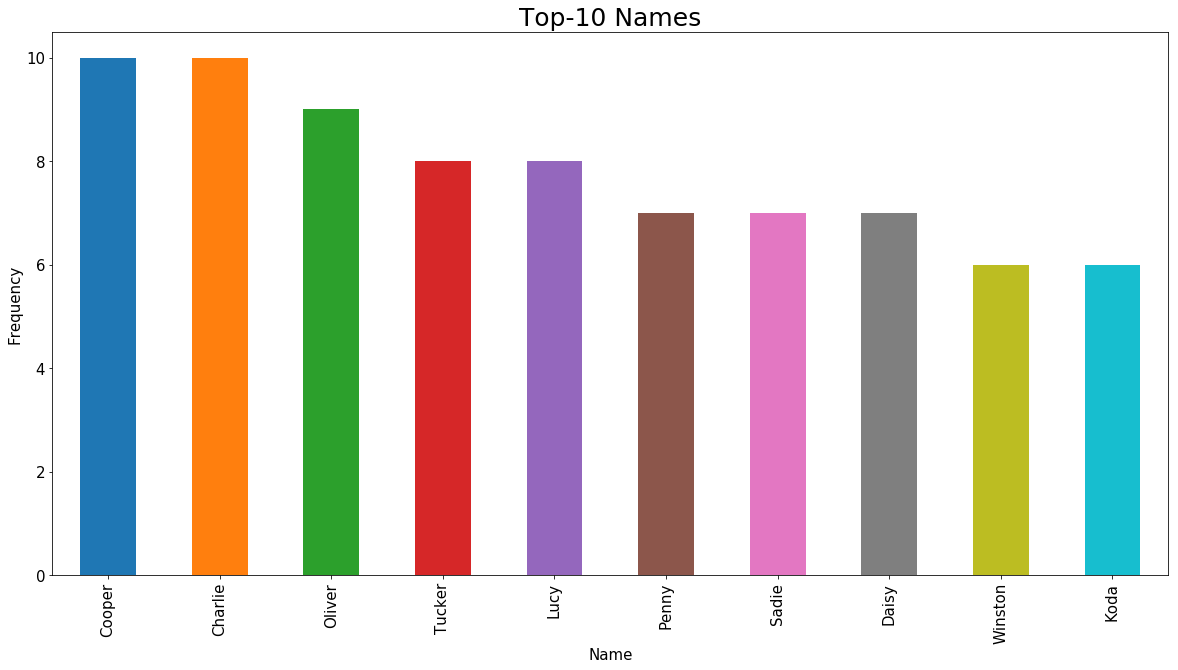

In [88]:
df_clean_names_filtered.groupby('name')['name'].count().sort_values(ascending=False).nlargest(10).plot(kind='bar', fontsize = 15)
plt.xlabel("Name", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Top-10 Names",fontsize=25)

3.2 Most Frequent Stage

In [84]:
df_stage = df_clean[df_clean['dog_stage'] != "None"]

In [85]:
df_stage.dog_stage.value_counts()

pupper     151
doggo      48 
puppo      20 
floofer    8  
Name: dog_stage, dtype: int64

Text(0,0.5,'Number of Tweets')

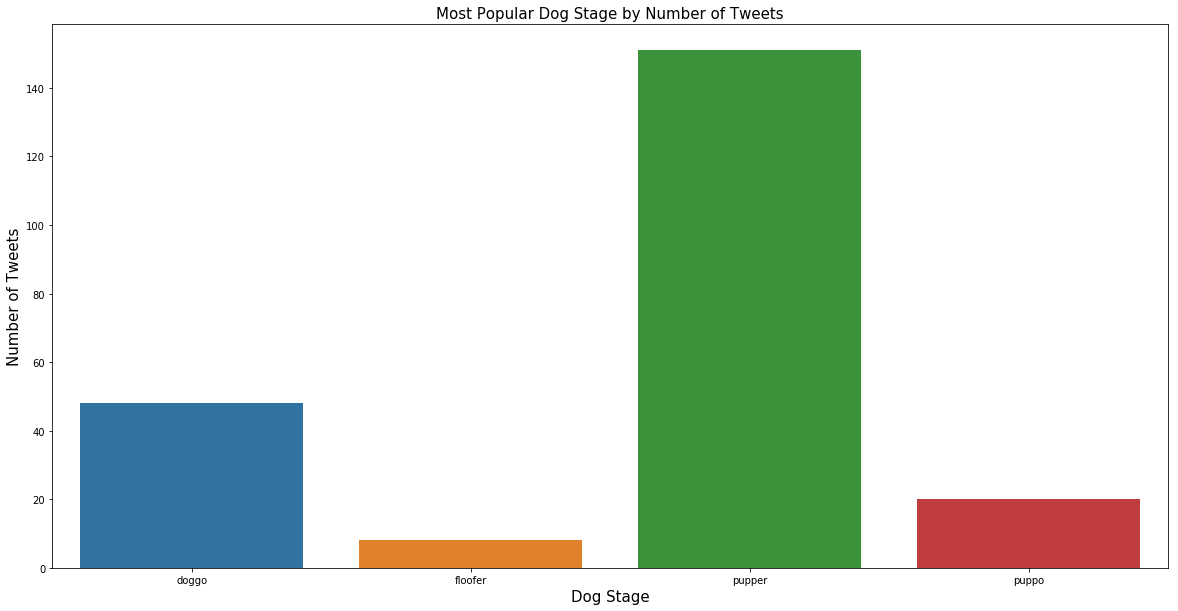

In [86]:
sns.countplot(data=df_stage, x='dog_stage')
plt.title('Most Popular Dog Stage by Number of Tweets', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel("Number of Tweets", fontsize = 15)

References

1. https://stackoverflow.com/questions/31128477/how-to-set-values-based-on-a-list-in-pandas-python

2. https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/#:~:text=DataFrame%20provides%20a%20member%20function%20drop()%20i.e.&text=It%20accepts%20a%20single%20or,delete%20multiple%20rows%20by%20conditions.

3. https://stackoverflow.com/questions/46593211/how-can-i-visualize-time-data-from-a-pandas-dataframe

4. https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html

5. https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

6. https://stackoverflow.com/questions/47408527/seaborn-countplot-display-only-n-most-frequent-categories